In [1]:
import folium as folium
import geopandas as gpd
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import unidecode
import math
import utm
from shapely.geometry import shape, LineString, Polygon
import matplotlib as mpl


In [2]:
folder_data = "../data/"
arq17 = "dados17.csv"

data17 = pd.read_csv(folder_data + arq17, dtype={'ZONA_O': str, 'ZONA_D': str}, header=0,delimiter=";", low_memory=False) 
data17 = data17.dropna(subset=['CO_O_X'])

data17 = data17.drop(['ID_DOM', 'FE_DOM', 'VIA_BICI','TP_ESTBICI','F_FAM','FE_FAM','FAMILIA','NO_MORAF',
                      'CONDMORA','QT_BANHO','QT_EMPRE','QT_AUTO','QT_MICRO','QT_LAVALOU','QT_GEL1'], axis=1)

In [3]:
print(data17['FE_VIA'].sum())

42006659.869834


In [4]:
modos17 = {0:'Other',1:'Subway',2:'Train',3:'Subway',4:'Bus',5:'Bus',6:'Bus',7:'Bus', 8:'Scholar Bus',9:'Car (Driver)', 10: 'Car (Passenger)', 11:'Taxi', 12:'Apps', 13:'Motorcycle', 14:'Motorcycle', 15:'Bike', 16:'Pedestrian', 17: 'Other'}
data17['MODOPRIN'] = data17['MODOPRIN'].replace(modos17)

<Figure size 2160x1440 with 0 Axes>

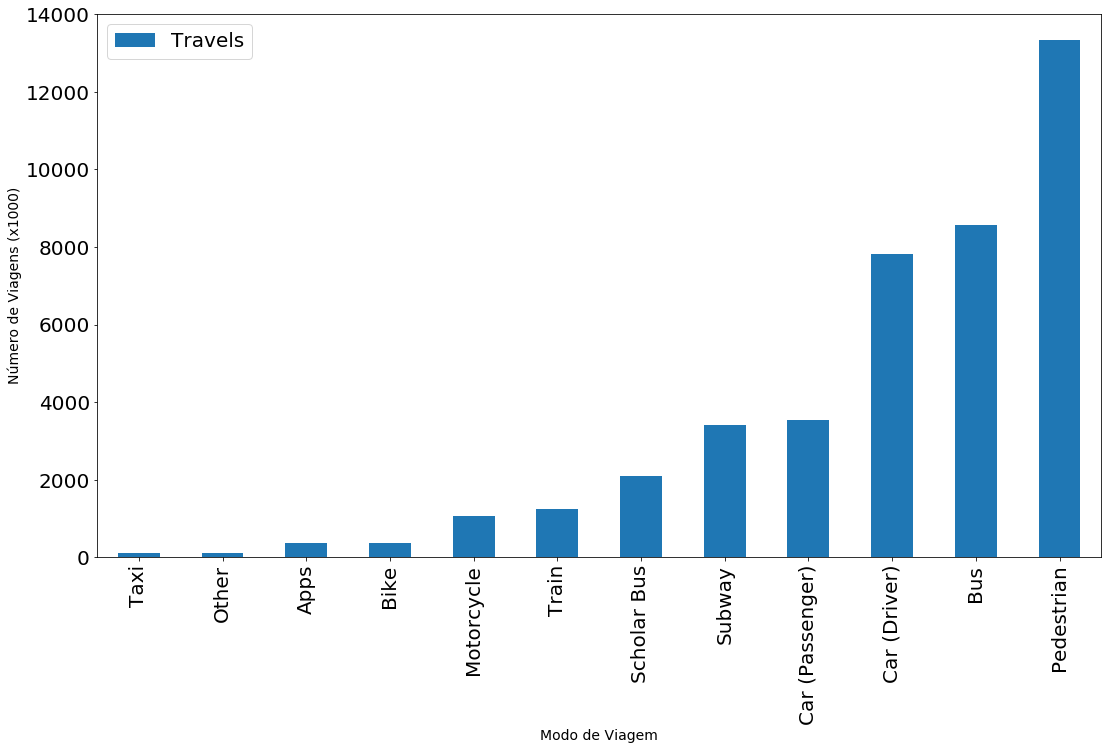

In [5]:
plt.rcParams.update({'font.size': 20})

plt.figure(figsize=(30,20))
conj1 = data17[['MODOPRIN', 'FE_VIA']].groupby(['MODOPRIN']).sum().sort_values(by=['FE_VIA']).reset_index()
conj1.columns = ['MODOPRIN', 'FE_VIA']

conj1['FE_VIA'] = conj1['FE_VIA'] / 1000
conj1 = conj1.rename(columns={"MODOPRIN": "Travel Mode", "FE_VIA": "Travels"})


ax = conj1.plot.bar(x='Travel Mode', y='Travels')
ax.figure.set_size_inches(18,10)

plt.xlabel('Modo de Viagem', fontsize=14)
plt.ylabel('Número de Viagens (x1000)', fontsize=14)

plt.show()


    Hour      Travels
0    3.0    27.192878
1    2.0    40.707653
2    1.0    46.908375
3    0.0   110.438598
4    4.0   409.845036
5   23.0   469.260863
6   21.0   590.729931
7   20.0   763.592200
8    5.0  1044.407357
9   22.0  1194.255684
10  10.0  1207.136297
11   9.0  1221.951503
12  19.0  1409.816656
13  15.0  1413.753660
14  14.0  1581.010197
15   8.0  1775.779540
16  11.0  2074.151150
17  16.0  2264.206542
18  13.0  2674.604869
19   7.0  3637.289562
20  18.0  4084.742065
21  17.0  4100.439955
22   6.0  4619.435071
23  12.0  5245.004231


<Figure size 2160x1440 with 0 Axes>

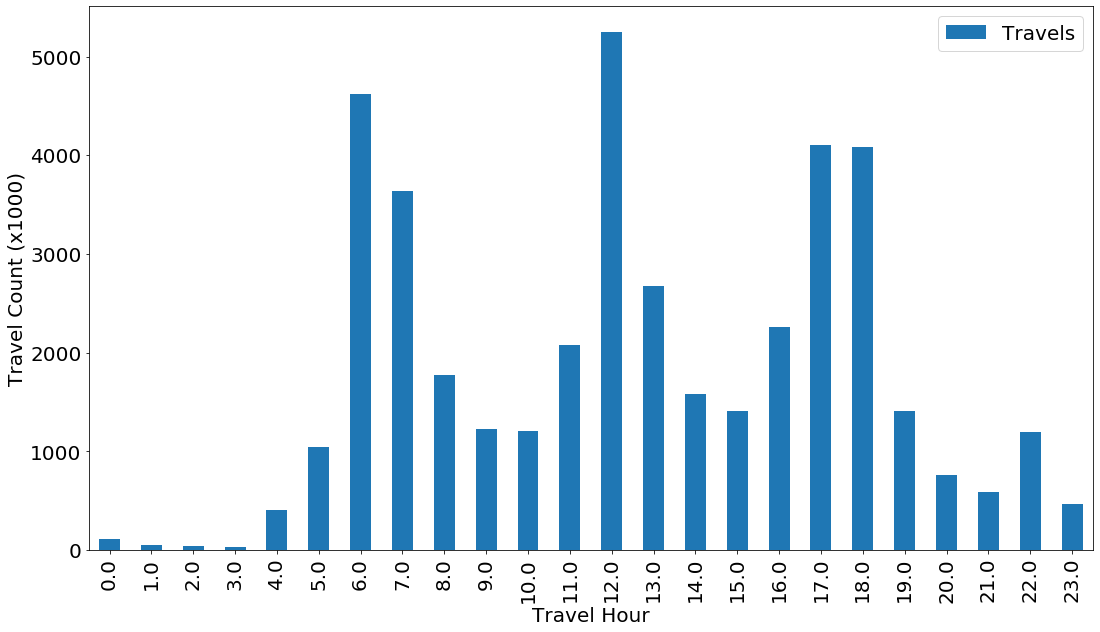

In [6]:
plt.figure(figsize=(30,20))
conj3 = data17[['H_SAIDA', 'FE_VIA']].groupby(['H_SAIDA']).sum().sort_values(by=['FE_VIA']).reset_index()
conj3.columns = ['H_SAIDA', 'FE_VIA']

conj3['FE_VIA'] = conj3['FE_VIA'] / 1000
conj3 = conj3.rename(columns={"H_SAIDA": "Hour", "FE_VIA": "Travels"})

print(conj3)


ax = conj3.sort_values(by=['Hour']).plot.bar(x='Hour', y='Travels')
ax.figure.set_size_inches(18,10)

plt.xlabel('Travel Hour', fontsize=20)
plt.ylabel('Travel Count (x1000)', fontsize=20)

plt.show()


In [7]:
modos17 = {0:'Other',1:'Work',2:'Work',3:'Work',4:'School',5:'Shopping',6:'Health',7:'Entertainment', 8:'House',9:'Seek Employment', 10: 'Personal Issues', 11:'Food'}
data17['MOTIVO_D'] = data17['MOTIVO_D'].replace(modos17)

<Figure size 2160x1440 with 0 Axes>

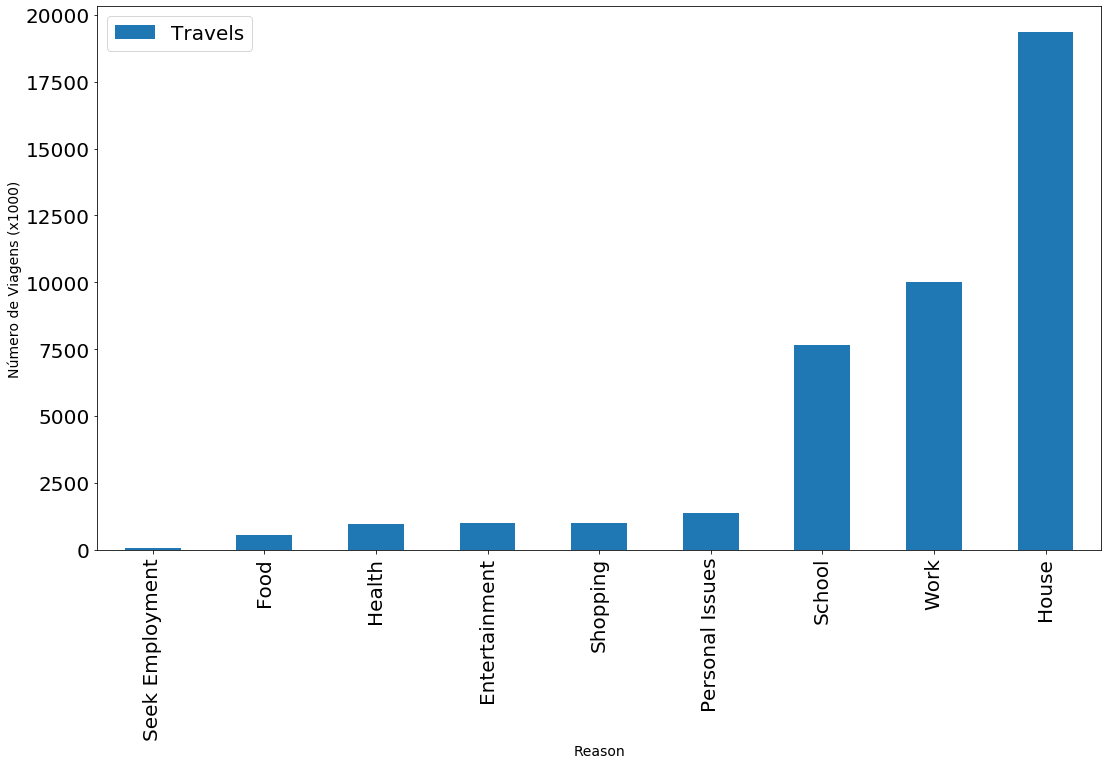

In [8]:
plt.figure(figsize=(30,20))
conj2 = data17[['MOTIVO_D', 'FE_VIA']].groupby(['MOTIVO_D']).sum().sort_values(by=['FE_VIA']).reset_index()
conj2.columns = ['MOTIVO_D', 'FE_VIA']

conj2['FE_VIA'] = conj2['FE_VIA'] / 1000
conj2 = conj2.rename(columns={"MOTIVO_D": "Reason", "FE_VIA": "Travels"})


ax = conj2.plot.bar(x='Reason', y='Travels')
ax.figure.set_size_inches(18,10)

plt.xlabel('Reason', fontsize=14)
plt.ylabel('Número de Viagens (x1000)', fontsize=14)

plt.show()


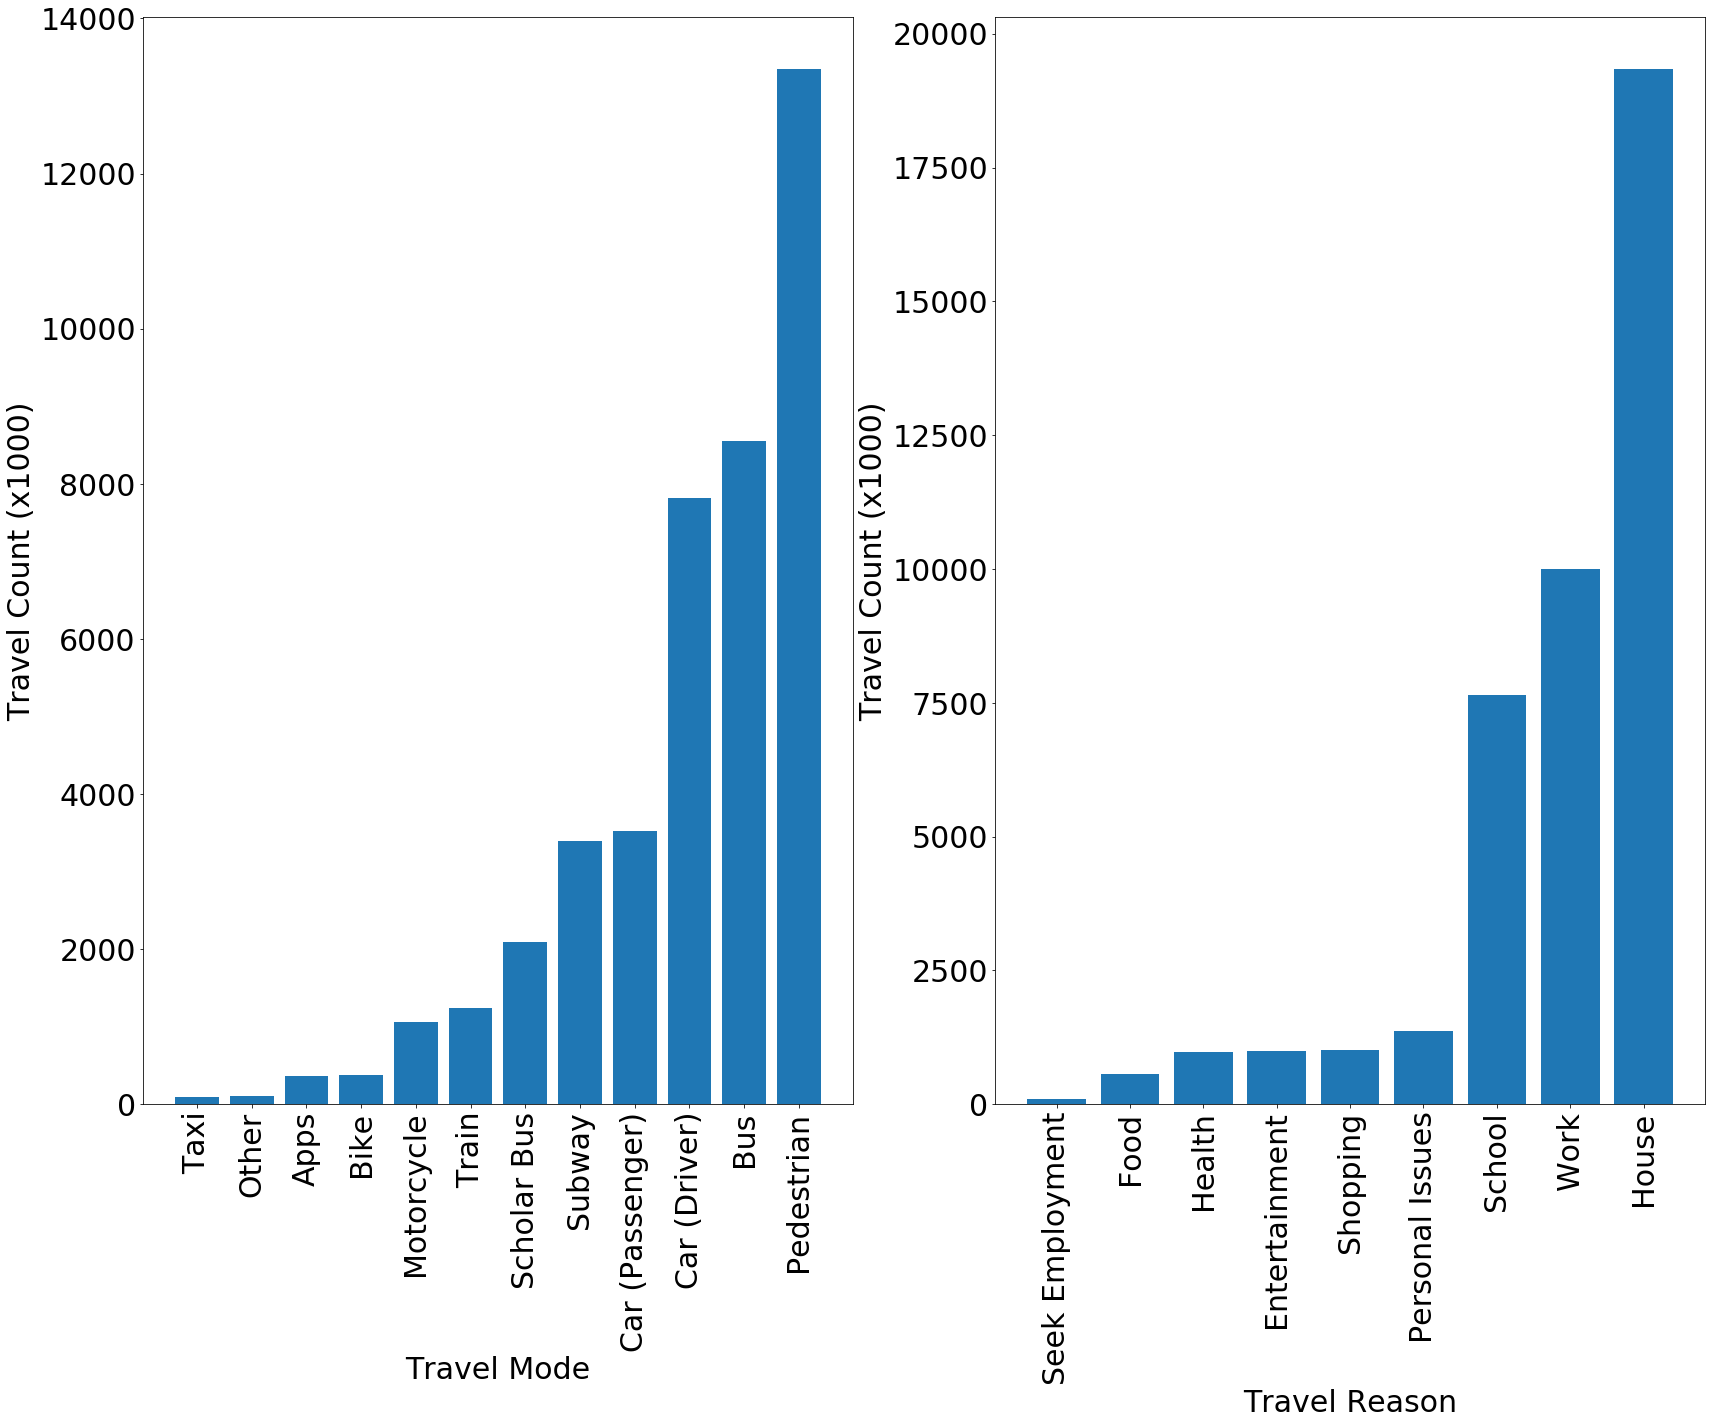

In [9]:
plt.figure(figsize = (28,20))

plt.rcParams.update({'font.size': 30})
plt.subplot(121)
plt.bar('Travel Mode', 'Travels', data = conj1 )
plt.xticks(rotation=90)
plt.xlabel('Travel Mode', fontsize=30)
plt.ylabel('Travel Count (x1000)', fontsize=30)




plt.subplot(122)
plt.bar('Reason', 'Travels', data = conj2 )
plt.xticks(rotation=90)
plt.xlabel('Travel Reason', fontsize=30)
plt.ylabel('Travel Count (x1000)', fontsize=30)

plt.show()